# Predicting wine quality

##### Author: Zhivko Balabanov

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score

As the weather warms up, you may find yourself walking into a wine shop and instinctively grabbing for a tall, thin bottle, tinted green and sealed with a screw top, anticipating the satisfaction of the light, bubbly, crisp white wine known as Vinho Verde. (Do you?)

On a summer afternoon, it’s really the perfect drink, and can take you into the evening by becoming a fantastic dinner wine. Although Vinho Verde’s popularity in the last decade has surged, there are a lot of misconceptions out there about this affordable and versatile wine. In fact, there’s far more to Vinho Verde than a little spritz—and Portuguese wine culture in general is full of history and intrigue. Surprise your friends at the next barbeque by serving them some knowledge about Vinho Verde as you fill their glasses with the wine.

“VINHO VERDE” IS NOT A GRAPE, OR A BLEND: IT’S A REGION
In the lush, green, rolling hills of northern Portugal, dotted with the orange rooftops of family households, is the region where Vinho Verde wine is produced. Although there are several origin stories behind its name, including the idea that it is harvested early and should be drunk young, many people in the region suggest that the name comes from the verdant natural setting.

Comprised of nine sub-regions in the Douro Valley, each with unique micro-climates but generally dominated by granitic soils, the Vinho Verde wine region starts just below the Portuguese-Spanish border, and extends all the way to the Atlantic Ocean, where it meets with the city of Port (where most Port wine is made). The region is also fairly wet and rainy, as two rivers run through it, the Douro and Minho.

### What is Vinho Verde ?

Vinho Verde (Portuguese: [ˈviɲu ˈveɾðɨ]) (literally 'green wine') refers to Portuguese wine that originated in the historic Minho province in the far north of the country. The modern-day 'Vinho Verde' region, originally designated in 1908, includes the old Minho province plus adjacent areas to the south. In 1976, the old province was dissolved.

Vinho Verde is not a grape variety, it is a DOC for the production of wine. The name means "green wine," but translates as "young wine", with wine being released three to six months after the grapes are harvested. They may be red, white, or rosé, and they are usually consumed soon after bottling. A Vinho Verde can also be a sparkling, a Late Harvest or even Brandy. In its early years of production, the slight effervesce of the wine came from malolactic fermentation taking place in the bottle. In winemaking this is usually considered a wine fault but Vinho Verde producers found that consumers liked the slightly fizzy nature. However, the wines had to be packaged in opaque bottles to hide the unseemly turbidity and sediment that the "in-bottle MLF" produced. Today, most Vinho Verde producers no longer follow this practice with the slight sparkle being added by artificial carbonation.

The region is characterized by its many small growers, which numbered around 19,000 as of 2014. Many of these growers used to train their vines high off the ground, up trees, fences, and even telephone poles so that they could cultivate vegetable crops below the vines that their families may use as a food source

### Styles

The Vinhos Verdes are light and fresh. At less than one bar of CO2 pressure, they do not quite qualify as semi-sparkling wines but are nonetheless slightly sparkling. The white Vinho Verde is very fresh, due to its natural acidity, with fruity and floral aromas that depend on the grape variety. The white wines are lemon- or straw-coloured, around 8.5 to 11% alcohol, and are made from local grape varieties Loureiro, Arinto, Trajadura, Avesso, and Azal. Vinho Alvarinho is made from Alvarinho grapes, from a small designated subregion of Monção and Melgaço. It has more alcohol (11.5 to 14%) and ripe tropical aromas. The reds are deep red and tannic, and are mostly made from Vinhão, Borraçal and Amaral grapes. The rosés are very fresh and fruity, usually made from Espadeiro and Padeiro grapes.

### History

The Romans Seneca the Younger and Pliny the Elder both made reference to vines in the area between the rivers Douro and Minho.

A record exists of a winery being donated to the Alpendurada convent in Marco de Canaveses in 870 AD, and the vineyards seem to have expanded over the following centuries, planted by religious orders and encouraged by tax breaks. Wines were mostly produced for domestic consumption, although Vinho Verde may have been exported in the 12th century, to England, Germany, and Flanders. The first definite exports to England are recorded by John Croft as taking place in 1788.

The arrival of maize in the 16th century left a distinctive stamp on viticulture in the region. To maximize production of maize, new regulations banished vines to the field margins, where they would be draped over trees and hedges, forcing the vignerons to pick them from tall ladders. Today, you can find some examples of vines trained by the old methods, but most of the Vinho Verde Region is now using modern methods, which give larger and better yield.

The "Vinho Verde Region" was demarcated by the law of September 18, 1908 and a decree of October 1 of the same year. The regulations controlling production were largely set in 1926, with recognition as a Denominação de Origem Controlada (DOC) in 1984. The AOC is overseen by the Comissão de Viticultura da Região dos Vinhos Verdes ("Wine Commission of the Vinho Verde Region").

Currently, nearly 21,000 hectares of vineyards are planted, making up 9% of the total in Portugal. There are around 19,000 producers, down from 72,590 in 1981. Around 600 bottlers in the region produce 85 million liters of wine each year. 86% of the wine from Vinho Verde is white.

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information:

Input variables (based on physicochemical tests):

1 - fixed acidity <br>
2 - volatile acidity <br>
3 - citric acid <br>
4 - residual sugar <br>
5 - chlorides <br>
6 - free sulfur dioxide <br>
7 - total sulfur dioxide <br>
8 - density <br>
9 - pH <br>
10 - sulphates <br>
11 - alcohol Output variable (based on sensory data): <br>
12 - quality (score between 0 and 10)<br>

In [3]:
red_wines = pd.read_csv('data/winequality-red.csv', delimiter = ';')

In [4]:
white_wines = pd.read_csv('data/winequality-white.csv', delimiter = ';')

### Get to know the data and check for null values

In [5]:
red_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
white_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Understanding Wine and Types <br>
Wine is an alcoholic beverage made from grapes which is fermented without the addition of sugars, acids, enzymes, water, or other nutrients

Red wine is made from dark red and black grapes. The color usually ranges from various shades of red, brown and violet. This is produced with whole grapes including the skin which adds to the color and flavor of red wines, giving it a rich flavor.

White wine is made from white grapes with no skins or seeds. The color is usually straw-yellow, yellow-green, or yellow-gold. Most white wines have a light and fruity flavor as compared to richer red wines.

#### Understanding Wine Attributes and Properties <br>

##### Acidity
Acids are one of the fundamental properties of wine and contribute greatly to the taste of the wine, Acidity in food and drink tastes tart and zesty. Tasting acidity is also sometimes confused with alcohol. Wines with higher acidity feel lighter-bodied because they come across as “spritzy”. Reducing acids significantly might lead to wines tasting flat. If you prefer a wine that is more rich and round, you enjoy slightly less acidity.

##### Acidity Characteristics

* Tingling sensation that focuses on the front and sides of your tongue. Feels like pop rocks.
* If you rub your tongue to the roof of your mouth it feels gravelly.
* Your mouth feels wet, like you bit into an apple.
* You feel like you can gleek.

##### Acid Types and Measures

* fixed acidity: Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes (except succinic). This variable is usually expressed in  g(tartaricacid)dm3  in the dataset.
* volatile acidity: These acids are to be distilled out from the wine before completing the production process. It is primarily constituted of acetic acid though other acids like lactic, formic and butyric acids might also be present. Excess of volatile acids are undesirable and lead to unpleasant flavor. In the US, the legal limits of volatile acidity are 1.2 g/L for red table wine and 1.1 g/L for white table wine. The volatile acidity is expressed in  g(aceticacid)dm3  in the dataset.
* citric acid: This is one of the fixed acids which gives a wine its freshness. Usually most of it is consumed during the fermentation process and sometimes it is added separately to give the wine more freshness. It's usually expressed in  gdm3  in the dataset.
* pH: Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine. Fixed acidity contributes the most towards the pH of wines. You might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.iamgeph

##### Sweetness
How sweet or dry (not sweet) is the wine? Our human perception of sweet starts at the tip of our tongue. Often, the very first impression of a wine is its level of sweetness. To taste sweetneww, focus your attention on the taste buds on the tip of your tongue. Are your taste buds tingling?–an indicator of sweetness. Believe it or not, many dry wines can have a hint of sweetness to make them more full-bodied.

##### How to Taste Sweetness in Wine

* Tingling sensation on the tip of your tongue.
* Slight oily sensation in the middle of your tongue that lingers.
* Wine has a higher viscosity; wine tears on side of glass slowly. (also an indicator of high ABV)
* Dry red wines such as cabernet sauvignon often have up to 0.9 g/L of residual sugar (common with cheap wines).
* A bone-dry wine can often be confused with a wine with high tannin.

##### Sweetness Measure:

* residual sugar: This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is stopped. It's usually expressed in  gdm3  in the dataset.

##### Salty
Salty is not a common wine descriptor. That it’s also not a positive one probably goes without saying. But the fact that wine-producing countries have (widely varying) legal maximums for sodium chloride in wine should tell you something. Salinity is a concern in dry locations when frequent irrigation increases soil salinity, which increases wine salinity. Soil composition often doesn’t translate in the way you’d expect into grape composition; salt is, unfortunately, an exception.

##### Salty Measure:

* chlorides: Chloride concentration in the wine is influenced by terroir and its highest levels are found in wines coming from countries where irrigation is carried out using salty water or in areas with brackish terrains. This is usually a major contributor to saltiness in wine. It's usually expressed in  g(sodiumchloride)dm3  in the dataset.

##### Sulfites
Sulfites in wine are chemical compounds (sulphur dioxide, or SO2) that occur naturally, to varying degree, in all types of wine. Sulfur Dioxide is naturally found in wines and is a byproduct of fermentation, but most winemakers choose to add a little extra to prevent the growth of undesirable yeasts and microbes, as well as to protect against oxidation.

Sulfur dioxide inhibits yeasts, preventing sweet wines from refermenting in the bottle. It’s an antioxidant, keeping the wine fresh and untainted by oxygen.

Ancient cultures in Greece, Rome, and Egypt, used sulfites to sterilise their containers of wine. Because sulfites are anti-microbial, it has the ability of killing off unwanted bacterias and wild yeast during wine making.

Very sensitive tasters have been noted to smell sulfur compounds in wine, although sulfur compounds are somewhat unrelated to sulfites. Sulfur compounds in wine called thiols range in flavor from citrus-like smells to cooked egg-like smells.

What’s interesting is that the warmer the wine, the more molecular sulfur it releases. This is why some wines have a nasty cooked-egg aroma when you open them. You can fix this issue by decanting your wine and chilling for about 15-30 minutes.

##### How Much Sulfur is in Wine?

* Wines with lower acidity need more sulfites than higher acidity wines. At pH 3.6 and above wines are much less stable and sulfites are necessary for shelf-life.
* Wines with more color (i.e. red wines) tend to need less sulfites than clear wines (i.e. white wines). A typical dry white wine may have around 100 mg/L whereas a typical dry red wine will have around 50–75 mg/L.
* Wines with higher sugar content tend to need more sulfites to prevent secondary fermentation of the remaining sugar.
* Wines that are warmer in temperature release free sulfur compounds (the nasty sulfur smell) and can be “fixed” simply through decanting and chilling the wine.

##### Sulfites Measure:

* sulphates: These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of the winemaking around the world and are considered essential. They are connected to the fermentation process and affects the wine aroma and flavor. Here, it's expressed in  g(potassiumsulphate)dm3  in the dataset.
* free sulfur dioxide: This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part binds. Winemakers will always try to get the highest proportion of free sulphur to bind. They are also known as sulfites and too much of it is undesirable and gives a pungent odour. This variable is expressed in  mgdm3  in the dataset.
* total sulfur dioxide: This is the sum total of the bound and the free sulfur dioxide ( SO2 ). Here, it's expressed in  mgdm3 . This is mainly added to kill harmful bacteria and preserve quality and freshness. There are usually legal limits for sulfur levels in wines and excess of it can even kill good yeast and give out undesirable odour.

##### Alcohol
Alcohol is formed as a result of yeast converting sugar during the fermentation process. The percentage of alcohol can vary from wine to wine. We interpret alcohol using many different taste receptors which is why it can taste bitter, sweet, spicy, and oily all at once. Your genetics actually plays a role in how bitter or sweet alcohol tastes. Regardless, we can all sense alcohol towards the backs of our mouths in our throats as a warming sensation.

##### Alcohol Characteristics:

* Wines with higher alcohol tend to taste bolder and more oily
* Wines with lower alcohol tend to taste lighter-bodied

##### Alcohol Measure:

* alcohol: It's usually measured in % vol or alcohol by volume (ABV)

##### Body
Are you in the mood for a light, medium or full-bodied wine? Body is the result of many factors – from wine variety, where it’s from, vintage, alcohol level and how it’s made. Body is a snapshot of the overall impression of a wine. You can improve your skill by paying attention to where and when it’s present.

##### Body Measure:

* density: This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol. Here, it's expressed in  gcm3.

In [7]:
red_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
white_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
red_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
white_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

The default correlation for the code below is Pearson correlation.

The Pearson correlation coefficient ranges from −1 to 1. A value of 1 implies that a linear equation describes the relationship between X and Y perfectly, with all data points lying on a line for which Y increases as X increases. A value of −1 implies that all data points lie on a line for which Y decreases as X increases. A value of 0 implies that there is no linear correlation between the variables.

Let`s see it in action !

In [11]:
# Check the correlation of the data
red_wines.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


As we can see from the correlation matrix above the alcohol has the strongest correlation for the quality of the wines.

In [12]:
white_wines.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


With the white wines it is the same. The more alcohol the wine has the better result it is given by the wine tasters.

The first thing that we need to consider when doing a correlation analysis we need to think of "Correlation does not imply causation". So we need to check (if there is way) that the above statements are true.

But for now we can say clearly that the more alcohol the wine has the better it is ranked because alcohol content affects both flavor and texture, and the evaporating alcohol that carries the aroma of the wine to our senses. Alcohol adds viscosity and helps balance sweetnes and acidity. On the other hand too much can damp-down flavor and aromas.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


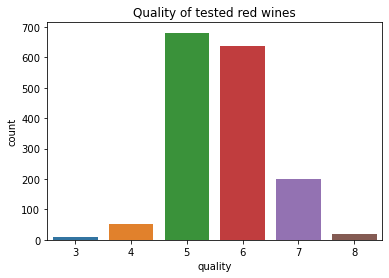

In [13]:
# what is the "quality" that occurs the most in white and red wines?
# Do some of the values occur more than other ?
sns.countplot(red_wines['quality'])

plt.title('Quality of tested red wines')
plt.show()

What is Data binning ?

Data binning, bucketing is a data pre-processing method used to minimize the effects of small observation errors. The original data values are divided into small intervals known as bins and then they are replaced by a general value calculated for that bin. This has a smoothing effect on the input data and may also reduce the chances of overfitting in case of small datasets.

In [14]:
red_wines['quality_label'] = red_wines.quality.apply(lambda q: 'low' if q <= 4 else 'medium' if q <= 6 else 'high')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


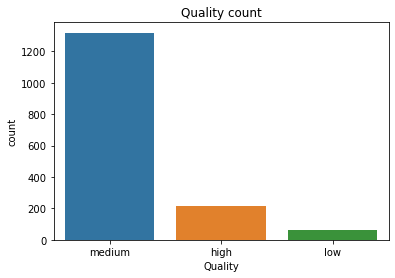

In [15]:
sns.countplot(red_wines['quality_label'])
plt.xlabel('Quality')
plt.title('Quality count')
plt.show()

In [16]:
# Check which are the top rated red wines
top_red_wines = red_wines[red_wines['quality_label'] == "high"]

In [17]:
top_red_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,high
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,high
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,high
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,7,high
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.9968,3.38,0.62,9.5,7,high


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


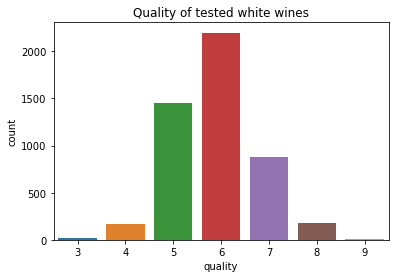

In [18]:
sns.countplot(white_wines['quality'])

plt.title('Quality of tested white wines')
plt.show()

In [19]:
white_wines['quality_label'] = white_wines.quality.apply(lambda q: 'low' if q <= 4 else 'medium' if q <= 6 else 'high')

In [20]:
white_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


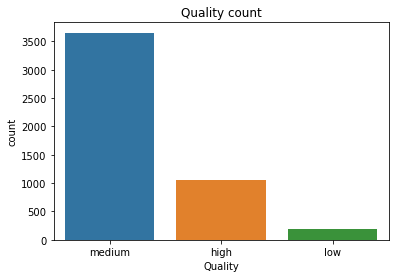

In [21]:
# Perform Data binning on the white wines also.
sns.countplot(white_wines['quality_label'])
plt.xlabel('Quality')
plt.title('Quality count')
plt.show()

In [22]:
# Check which are the top rated white wines
filter_list = [7, 8, 9]
top_white_wines = white_wines[white_wines['quality'].isin(filter_list)]

In [23]:
top_white_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
13,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7,high
15,6.6,0.17,0.38,1.5,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,7,high
17,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8,high
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8,high
21,6.4,0.31,0.38,2.9,0.038,19.0,102.0,0.9912,3.17,0.35,11.0,7,high


As we can see from the analysis above we can conclude that the big part of the wines are in the middle of the graph or let us say that their quality is average (5, 6). But there are some wines which are top rated (7, 8, 9) a very few of them are classified as 8s or 9s. Lets explore what makes this wines good and why are they considered good or top rated. After that we will try to see why are there wines which are not so well rated or if we can say the ones with the worst quality(3, 4). We will also try to explore the ones that are average(5, 6).

In [24]:
data = [red_wines, white_wines]

In [25]:
wine_to_drop = pd.concat(data)

In [26]:
wines = wine_to_drop.drop('quality', axis = 1)

In [27]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,medium
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,medium
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,high


In [28]:
mapping_quality = {'low':0, 'medium':1, 'high':2}
wines['quality_label'] = wines['quality_label'].map(mapping_quality)

In [29]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,2


In [31]:
target_column = ['quality_label']
predictors = list(set(list(wines.columns)) - set(target_column))
wines[predictors] = wines[predictors] / wines[predictors].max()

In [32]:
X = wines[predictors]
y_df = wines[target_column]
y = y_df.to_numpy().ravel()

In [33]:
print(X.shape)
print(y.shape)

(6497, 11)
(6497,)


### Check several model and their performance on the data provided.

In [39]:
model_params = {
    'svm': {
        'model': SVC(gamma = 'auto'),
        'params':{
            'C': [1, 5, 10, 20],
            'kernel': ['rbf']
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion': ['entropy', 'gini'],
            'max_depth': [5, 10, 15]
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [1, 5, 10, 15],
            'max_depth': [5, 10, 15, 20]
        }
    },
    'logistic_regression':{
        'model': LogisticRegression(solver = 'liblinear', multi_class = 'auto'),
        'params':{
            'C': [1, 5, 10, 20]
        }
    }
}

In [76]:
score = []
k_fold = StratifiedKFold(n_splits = 5)
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = k_fold, return_train_score = False)
    clf.fit(X_train, y_train)
    score.append({
        'Model': model_name,
        'Best_score': clf.best_score_,
        'Best_params': clf.best_params_
    })

In [77]:
clf_df = pd.DataFrame(score, columns =['Model', 'Best_score', 'Best_params'])

In [78]:
clf_df

,Model,Best_score,Best_params
0,svm,0.765560,"{'C': 1, 'kernel': 'rbf'}"
1,decision_tree,0.790632,"{'criterion': 'entropy', 'max_depth': 5}"
2,random_forest,0.834836,"{'max_depth': 15, 'n_estimators': 15}"
3,logistic_regression,0.788872,{'C': 20}


### Select the best model from the listed above

In [107]:
clf_rfc = RandomForestClassifier(max_depth = 30, n_estimators = 15)
scores = cross_val_score(clf_rfc, X_train, y_train, cv = k_fold, scoring = 'accuracy')
print(f"Cross validation scores {scores}")
print(f"Mean cross validation score {scores.mean():.2f}")

Cross validation scores [0.83736264 0.82417582 0.83168317 0.83938394 0.83278328]
Mean cross validation score 0.83


In [102]:
clf_rfc.fit(X_train, y_train)
y_pred = clf_rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy:{accuracy:.2f}")

Model accuracy:0.83
